Darth Vapor—Often containing high doses of nicotine, vaping (inhalation of an aerosol created by vaporizing
a liquid) is hooking a new generation that might otherwise have chosen not to use tobacco products. Build a
mathematical model that predicts the spread of nicotine use due to vaping over the next 10 years. Analyze how the
growth of this new form of nicotine use compares to that of cigarettes.

In [1]:
# Loading the dataset:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import scipy.stats as ss


%matplotlib inline

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.utils import resample

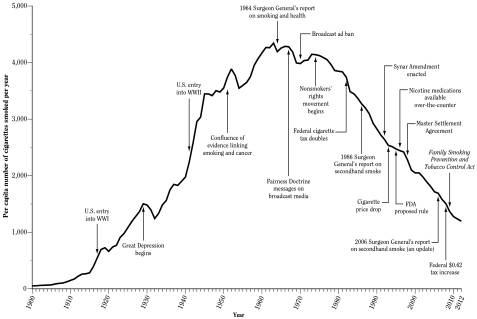

In [82]:
import chardet
import pandas as pd

with open('high_school_vaping_data.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


data_hs = pd.read_csv('high_school_vaping_data.csv', encoding=result['encoding'],header = None ).T
data_hs.columns = ['Date','Characteristic','Overall','Gender','Female','Male','Race/ethnicity','White','Black or African American','Hispanic or Latino','Other']
data_hs.drop(axis = 0, index = 0, inplace = True)
data_hs.set_index(['Date', 'Characteristic'], inplace = True)
data_hs.sort_index(inplace=True)
data_hs.head()

Overall Gender          Female            Male  \
Date Characteristic                                                          
2011 % (95% CI)      1.5 (1.2–2.0)     NaN  0.7 (0.5–1.0)   2.3 (1.7–3.2)    
     SE                        0.2     NaN            0.1             0.4    
2012 % (95% CI)      2.8 (2.3–3.5)     NaN  1.9 (1.5–2.4)   3.7 (2.9–4.8)    
     SE                        0.3     NaN            0.2             0.5    
2013 % (95% CI)      4.5 (3.8–5.3)     NaN  3.5 (2.8–4.3)   5.5 (4.5–6.8)    

                    Race/ethnicity           White Black or African American  \
Date Characteristic                                                            
2011 % (95% CI)                NaN  1.8 (1.3–2.4)                         —    
     SE                        NaN            0.3                         —    
2012 % (95% CI)                NaN  3.4 (2.7–4.2)             1.1 (0.7–1.9)    
     SE                        NaN            0.4                       0.3    
2013 % (95% CI)                NaN  4.8 (3.8–6.1)             2.7 (1.9–3.9)    

                    Hispanic or Latino           Other  
Date Characteristic                                     
2011 % (95% CI)         1.3 (0.8–2.1)               —   
     SE                           0.3               —   
2012 % (95% CI)         2.7 (1.9–3.8)               —   
     SE                           0.5               —   
2013 % (95% CI)         5.3 (4.2–6.6)   4.0 (2.3–6.9)

In [83]:
data_hs.head()

Overall Gender          Female            Male  \
Date Characteristic                                                          
2011 % (95% CI)      1.5 (1.2–2.0)     NaN  0.7 (0.5–1.0)   2.3 (1.7–3.2)    
     SE                        0.2     NaN            0.1             0.4    
2012 % (95% CI)      2.8 (2.3–3.5)     NaN  1.9 (1.5–2.4)   3.7 (2.9–4.8)    
     SE                        0.3     NaN            0.2             0.5    
2013 % (95% CI)      4.5 (3.8–5.3)     NaN  3.5 (2.8–4.3)   5.5 (4.5–6.8)    

                    Race/ethnicity           White Black or African American  \
Date Characteristic                                                            
2011 % (95% CI)                NaN  1.8 (1.3–2.4)                         —    
     SE                        NaN            0.3                         —    
2012 % (95% CI)                NaN  3.4 (2.7–4.2)             1.1 (0.7–1.9)    
     SE                        NaN            0.4                       0.3    
2013 % (95% CI)                NaN  4.8 (3.8–6.1)             2.7 (1.9–3.9)    

                    Hispanic or Latino           Other  
Date Characteristic                                     
2011 % (95% CI)         1.3 (0.8–2.1)               —   
     SE                           0.3               —   
2012 % (95% CI)         2.7 (1.9–3.8)               —   
     SE                           0.5               —   
2013 % (95% CI)         5.3 (4.2–6.6)   4.0 (2.3–6.9)

In [87]:
cigs = pd.read_csv('cigs_stats.csv')

cigs.head()

,Years,Billions of Cigarettes
0,1880,10
1,1890,20
2,1900,50
3,1910,100
4,1920,300


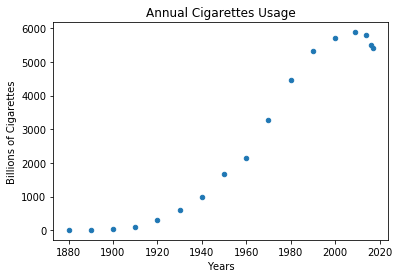

In [88]:
cigs.plot.scatter(x='Years', y='Billions of Cigarettes', title='Annual Cigarettes Usage')

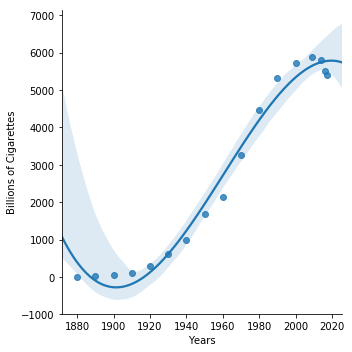

In [91]:
sns.lmplot(x='Years', y='Billions of Cigarettes', data=cigs, order = 3, fit_reg=True)